# MNIST

In [1]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False) #DataFrame이 아님
mnist #이미지 데이터픽셀

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\_openml.py:65: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [11]:
mnist.keys() 

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
type(mnist)

sklearn.utils.Bunch

In [6]:
X = mnist['data']

In [8]:
y = mnist['target']

In [9]:
X.shape #784개의 컬럼은 이미지 픽셀이다. 28 * 28픽셀 사이즈의 이미지다. 

(70000, 784)

In [10]:
y.shape

(70000,)

In [12]:
28*28

784

In [40]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
X[0] #첫번째 행. 784개의 픽셀 정보가 들어가 있다.

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [35]:
some_digit = X[3]

In [36]:
some_digit_img = some_digit.reshape(28, 28) # 784개의 가로가 28가로 28세로로 바뀐다.

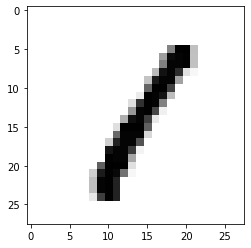

In [37]:
plt.imshow(some_digit_img, cmap='binary') #binary를 해줌으로 흑백을 받음 원래 흑백데이터인데 컬러로 인식해서 이상한 컬러가 나옴.
# 인간의 사고력으로 보았을때  5로 보인다 이는 실제로도 정답이다.
# 데이터가 균형적으로 나뉘어있다.

X는 특성데이터 y는 정답데이터

In [38]:
y[3]

'1'

In [39]:
type(y[0]) # y값은 자료형을 바꿀 필요가 있다. 계산할 때는 문자가 아닌 숫자로 해야 편함.

str

In [42]:
y = y.astype(np.uint8)
y #타입이 바뀐 것을 볼 수 있다.

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

train_test_split으로 바꾸는 것이 일반적이지만 이미 잘 섞여 있다

60000, 10000개로 나누는 것이 좋다

In [43]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [51]:
(y_train == 0).sum() # 60000개의 훈련 데이터 중에 0의 개수는 5923개라는 것이다. 거진 10%이므로 각 숫자마다 10%언저리로 가지고 있다.

5923

# 이진 분류기

In [52]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [55]:
y_train_5 = (y_train == 5) #y라는 거 자체가 target값.
y_test_5 = (y_test == 5)

In [56]:
y_train_5 #5인애들만 1 (약 10% 정도인 6000개 정도) 다른 애들은 0 범주형 데이터 처럼 나누려는 것 같다. 
#5인지 아닌지로 일단 바뀜

array([ True, False, False, ...,  True, False, False])

In [63]:
(y_train_5 == 1).sum()

5421

In [65]:
(y_train_5 == 0).sum() #이렇게 90%가 같은 답의 경우 모델을 아래와 같이 만들어도 90%의 정확도를 가짐

54579

xxx_model
{
    return '5아님'
}
* 데이터가 불균형하면 해당코드조차 90%의 정확도를 가진다.

### 분균형한 데이터 셋에 대해서는 정확도가 성능 지표가 안된다.

In [ ]:
X_train, y_train

In [69]:
from sklearn.linear_model import SGDClassifier #괜찮은 분류기라고만 알아두자

In [70]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [73]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy') #불균형 데이터에선 accuracy로 성능을 측정하기 애매하다

array([0.95035, 0.96035, 0.9604 ])

In [76]:
from sklearn.model_selection import cross_val_predict # 예측값 반환
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [79]:
y_train_pred.shape # 60000개의 데이터에 대해서 예측을 한다.

(60000,)